Розмір датасету: (582, 18)
Назви колонок: ['Unnamed: 0', 'name', 'album', 'release_date', 'track_number', 'id', 'uri', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms']

Кількість пропусків у кожній колонці:
Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64


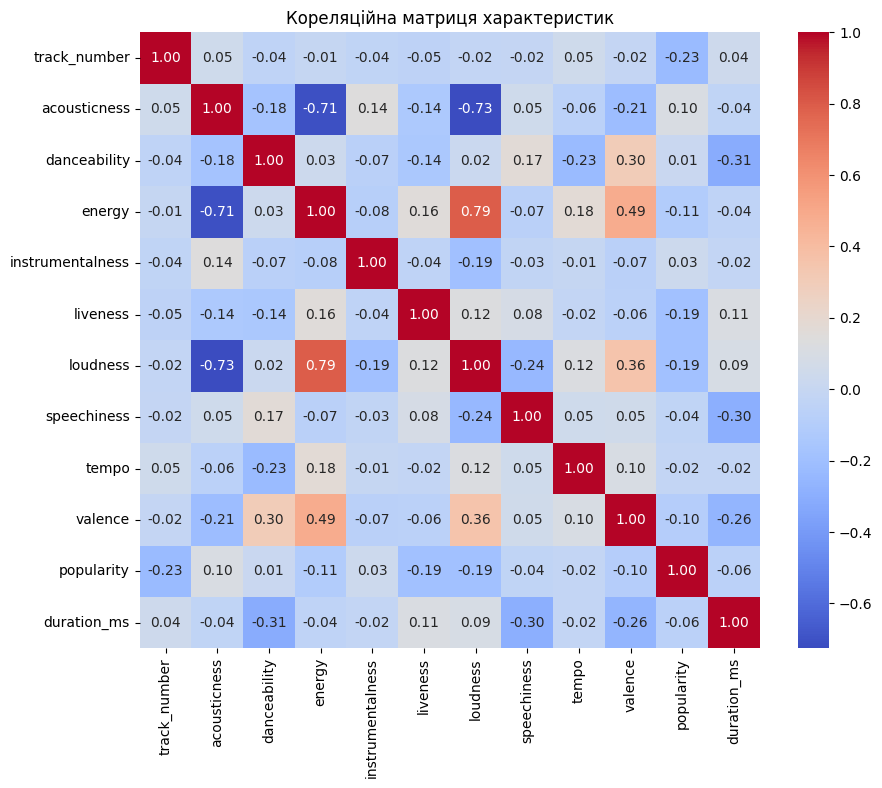

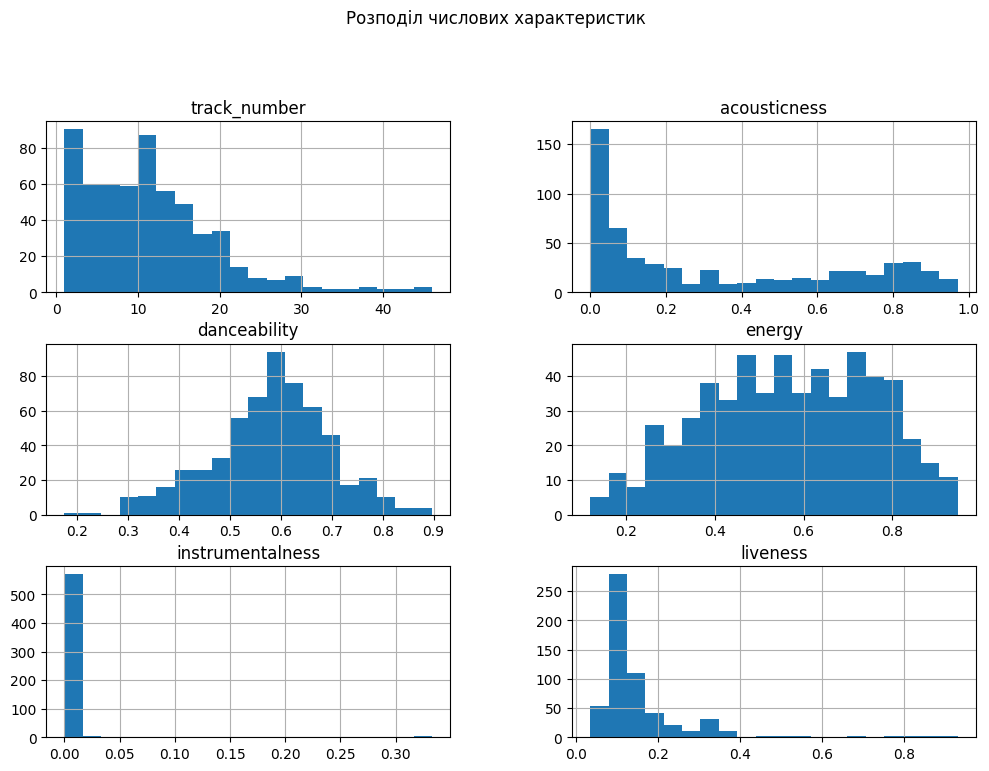

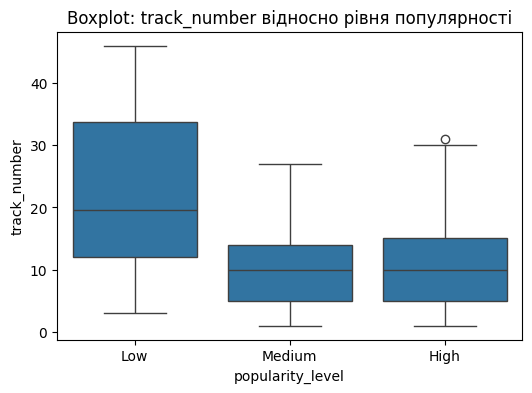

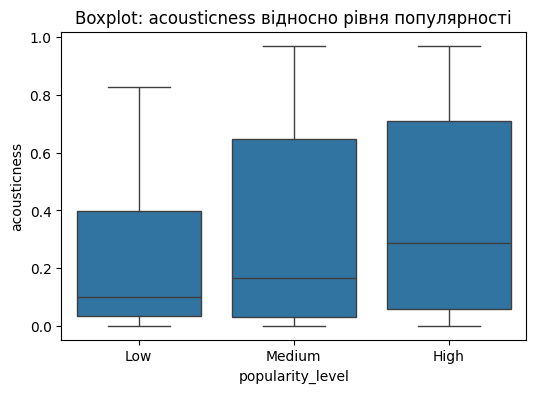

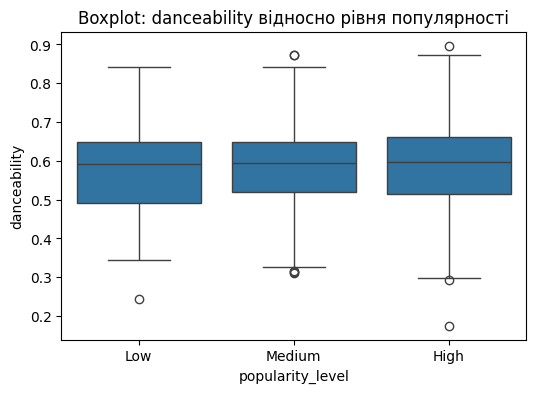

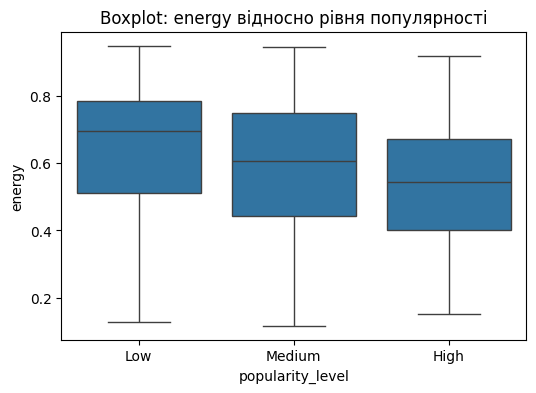


 Підбір параметра n_neighbors для kNN:
Найкращий параметр n_neighbors: {'n_neighbors': 7}

 Підбір параметрів C і gamma для SVM:
Найкращі параметри для SVM: {'C': 1, 'gamma': 0.1}

=== kNN ===
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.14      0.22         7
           1       0.37      0.48      0.41        48
           2       0.52      0.44      0.47        62

    accuracy                           0.44       117
   macro avg       0.46      0.35      0.37       117
weighted avg       0.45      0.44      0.43       117

Confusion Matrix:
[[ 1  5  1]
 [ 1 23 24]
 [ 0 35 27]]


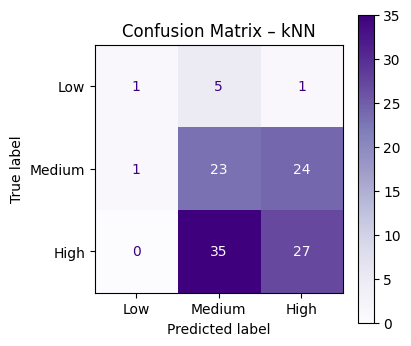


=== Decision Tree ===
Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.14      0.18         7
           1       0.52      0.71      0.60        48
           2       0.64      0.48      0.55        62

    accuracy                           0.56       117
   macro avg       0.47      0.45      0.44       117
weighted avg       0.56      0.56      0.55       117

Confusion Matrix:
[[ 1  3  3]
 [ 0 34 14]
 [ 3 29 30]]


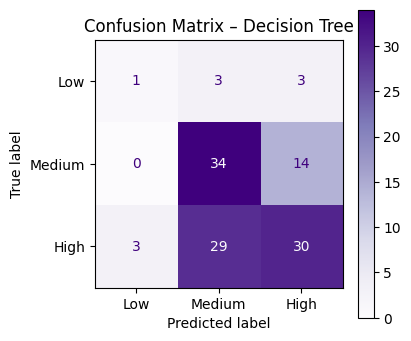


=== SVM ===
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.14      0.22         7
           1       0.47      0.46      0.46        48
           2       0.59      0.65      0.62        62

    accuracy                           0.54       117
   macro avg       0.52      0.42      0.43       117
weighted avg       0.53      0.54      0.53       117

Confusion Matrix:
[[ 1  4  2]
 [ 0 22 26]
 [ 1 21 40]]


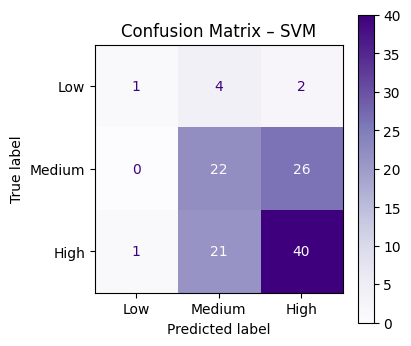


=== Random Forest ===
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.29      0.33         7
           1       0.48      0.60      0.54        48
           2       0.60      0.50      0.54        62

    accuracy                           0.53       117
   macro avg       0.49      0.46      0.47       117
weighted avg       0.54      0.53      0.53       117

Confusion Matrix:
[[ 2  3  2]
 [ 0 29 19]
 [ 3 28 31]]


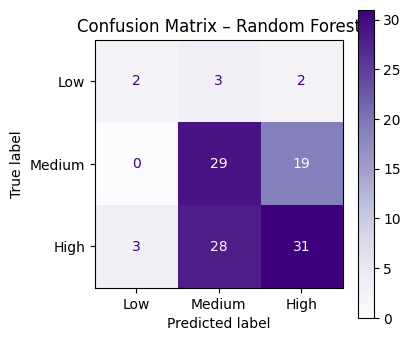


=== AdaBoost ===
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.29      0.33         7
           1       0.50      0.62      0.56        48
           2       0.63      0.53      0.58        62

    accuracy                           0.56       117
   macro avg       0.51      0.48      0.49       117
weighted avg       0.57      0.56      0.55       117

Confusion Matrix:
[[ 2  3  2]
 [ 1 30 17]
 [ 2 27 33]]


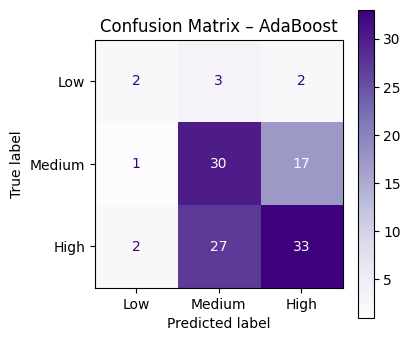

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1 Завантаження даних
df = pd.read_csv('taylor_swift_spotify.csv')
print("Розмір датасету:", df.shape)
print("Назви колонок:", df.columns.tolist())

# 2 Перевірка та обробка пропусків
print("\nКількість пропусків у кожній колонці:")
print(df.isnull().sum())
df = df.dropna()

# Видалення непотрібних або текстових колонок
df = df.drop(columns=['Unnamed: 0', 'name', 'album', 'id', 'uri', 'release_date'], errors='ignore')

# 3 Візуалізація
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Кореляційна матриця характеристик")
plt.show()

# Гістограми
num_cols = df.select_dtypes(include=[np.number]).columns[:6]
df[num_cols].hist(figsize=(12, 8), bins=20)
plt.suptitle("Розподіл числових характеристик", y=1.02)
plt.show()

# Boxplots відносно цільової змінної popularity
target_col = 'popularity'
df['popularity_level'] = pd.cut(df[target_col], bins=3, labels=['Low', 'Medium', 'High'])
for col in df.select_dtypes(include=[np.number]).columns[:4]:
    if col != target_col:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x='popularity_level', y=col, data=df)
        plt.title(f"Boxplot: {col} відносно рівня популярності")
        plt.show()

# 4 Нормалізація даних
X = df.drop(columns=[target_col, 'popularity_level'])
y = pd.cut(df[target_col], bins=3, labels=[0, 1, 2])  # переведення цільової змінної у 3 класи
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5 Навчання моделей

# --- kNN ---
print("\n Підбір параметра n_neighbors для kNN:")
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11]}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_
print("Найкращий параметр n_neighbors:", grid_knn.best_params_)

# --- Decision Tree ---
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

# --- SVM ---
print("\n Підбір параметрів C і gamma для SVM:")
param_grid_svm = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1]}
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5)
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_
print("Найкращі параметри для SVM:", grid_svm.best_params_)

# --- Random Forest ---
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# --- AdaBoost ---
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)

# 6 Оцінка моделей
models = {
    "kNN": best_knn,
    "Decision Tree": tree,
    "SVM": best_svm,
    "Random Forest": rf,
    "AdaBoost": ada
}

for name, model in models.items():
    print(f"\n=== {name} ===")
    y_pred = model.predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Візуалізація confusion matrix
    plt.figure(figsize=(4, 4))
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred),
                                  display_labels=['Low', 'Medium', 'High'])
    disp.plot(cmap='Purples', values_format='d', ax=plt.gca())
    plt.title(f"Confusion Matrix – {name}")
    plt.show()



